In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

In [ ]:
data = pd.read_csv(r'gero_01.csv')

In [ ]:
data.head()

,RIAGENDR,RIDAGEMN,INDFMINC,INDHHINC,DMDMARTL,RIDRETH1,INDFMPIR,LBDBANO,LBDEONO,LBDLYMNO,...,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBXSTB,LBXSTP,LBXSTR,LBXSUA,MCQ160B
0,2.0,-1.651695,-1.593689,-1.994973,0.221957,0.916553,-0.928971,4.190353e-02,0.217859,2.399367,...,3.999445,133.626978,139.115918,277.713014,3.862182,0.685092,7.24525,137.980962,5.315611,0.0
1,1.0,1.952942,2.062087,0.292809,0.221957,0.097000,1.528525,5.397605e-79,0.300000,1.600000,...,4.060000,140.000000,144.100000,288.000000,3.300000,0.700000,7.20000,115.000000,6.100000,2.0
2,2.0,-0.865647,-0.873707,-0.419760,0.221957,0.097000,-0.364566,5.397605e-79,1.100000,2.800000,...,3.999445,133.626978,139.115918,277.713014,3.862182,0.685092,7.24525,137.980962,5.315611,0.0
3,1.0,-1.741556,-1.674348,-1.994973,0.221957,0.916553,-1.257352,1.000000e-01,1.000000,5.100000,...,3.999445,133.626978,139.115918,277.713014,3.862182,0.685092,7.24525,137.980962,5.315611,0.0
4,1.0,1.052884,1.064450,1.112452,-1.382532,0.097000,1.528525,5.397605e-79,0.200000,2.200000,...,4.630000,133.000000,137.500000,276.000000,3.200000,0.500000,7.30000,341.000000,6.800000,2.0


In [ ]:
data.dtypes

RIAGENDR    float64
RIDAGEMN    float64
INDFMINC    float64
INDHHINC    float64
DMDMARTL    float64
             ...   
LBXSTB      float64
LBXSTP      float64
LBXSTR      float64
LBXSUA      float64
MCQ160B     float64
Length: 64, dtype: object

In [ ]:
data.isnull().sum()

RIAGENDR    0
RIDAGEMN    0
INDFMINC    0
INDHHINC    0
DMDMARTL    0
           ..
LBXSTB      1
LBXSTP      1
LBXSTR      1
LBXSUA      1
MCQ160B     1
Length: 64, dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
X = data.drop('RIAGENDR', axis=1)
# Теперь выделим нужный столбец
y = data['RIAGENDR']

In [ ]:
# test_size показывает, какой объем данных нужно выделить для тестового набора
# Этот параметр можно использовать для воссоздания определённого результата:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
print(X_train)
print(y_train)

       RIDAGEMN  INDFMINC  INDHHINC  DMDMARTL  RIDRETH1  INDFMPIR  \
47267  1.718653  1.798647  0.203491  0.869504  0.916553 -1.036755   
44087  1.006957  1.014686  0.203491 -1.382532  0.097000  1.020054   
21466 -0.473279 -0.502205 -0.855246  1.305783  0.916553 -1.003865   
39969 -0.311295 -0.345754  0.203491  0.221957 -0.704665  0.854170   
5480   0.907121  0.906945  0.203491  1.671651  0.916553  0.207679   
...         ...       ...       ...       ...       ...       ...   
522   -0.344705 -0.378190 -0.419760  1.305783 -1.482895 -0.260470   
33682 -1.896067 -1.812358  7.285741  0.221957  0.916553  0.207679   
45333 -0.524809 -0.551566  0.203491  0.221957 -0.704665 -1.185257   
51889 -0.556341 -0.581680  0.203491  0.221957  0.916553 -1.544360   
57039 -0.530031 -0.556559  0.203491  0.221957 -1.482895  0.207679   

            LBDBANO       LBDEONO  LBDLYMNO  LBDMONO  ...   LBXSKSI  \
47267  5.397605e-79  1.000000e-01       1.7      0.6  ...  3.900000   
44087  1.000000e-01  2.000000

In [ ]:
# В KNN-модели нужно указать параметр n_neighbors
# Это число точек, на которое будет смотреть
# классификатор, чтобы определить, к какому классу принадлежит новая точка
KNN_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
KNN_model.fit(X_train, y_train)
# KNN_model.fit(data_train[['x1','x2']], data_train['y_clas'])

KNeighborsClassifier()

In [ ]:
KNN_prediction = KNN_model.predict(X_test)
# KNN_model.predict(data_test[['x1','x2']])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(KNN_prediction, y_test))

0.6925438242184344


In [ ]:
# Grid Search (решетчатый поиск)
params = {'n_neighbors': range(10, 35)}
params

{'n_neighbors': range(10, 50)}

In [131]:
%%time
knn_cv = GridSearchCV(KNeighborsClassifier(), params, cv=10, scoring='accuracy')
knn_cv.fit(X_train, y_train)
# print_cv_result(knn_cv, X_test, y_test)

CPU times: user 20min 33s, sys: 1.78 s, total: 20min 35s
Wall time: 12min 24s


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(10, 50)}, scoring='accuracy')

In [132]:
knn_cv.cv_results_

{'mean_fit_time': array([0.03129005, 0.02664099, 0.03034885, 0.02726729, 0.02459028,
        0.02376406, 0.02358553, 0.02378311, 0.02477462, 0.02419198,
        0.02451646, 0.0233706 , 0.02438164, 0.02512305, 0.02376652,
        0.02555745, 0.02649949, 0.02725277, 0.02613459, 0.02607017,
        0.02494643, 0.0239851 , 0.02451489, 0.02375364, 0.02546234,
        0.02347367, 0.02336133, 0.02413559, 0.02381155, 0.02517014,
        0.02627583, 0.02649281, 0.02403662, 0.02438006, 0.02443311,
        0.02328715, 0.02422462, 0.02346666, 0.0252425 , 0.02275541]),
 'std_fit_time': array([0.00528687, 0.00447005, 0.00919312, 0.00454219, 0.00297489,
        0.00236356, 0.00256499, 0.00335256, 0.00424838, 0.002594  ,
        0.00459743, 0.00224849, 0.003343  , 0.00415022, 0.00340104,
        0.00459163, 0.00257591, 0.00408518, 0.00465571, 0.00417579,
        0.0046417 , 0.00357222, 0.00405832, 0.00334986, 0.00366924,
        0.00245464, 0.00340478, 0.00391564, 0.00389527, 0.00430081,
        0.002

In [133]:
# Лучшая модель
knn_cv.best_estimator_

KNeighborsClassifier(n_neighbors=28)

In [134]:
# Лучшее значение метрики
knn_cv.best_score_

0.709077823738877

In [135]:
# Лучшее значение параметров
knn_cv.best_params_

{'n_neighbors': 28}

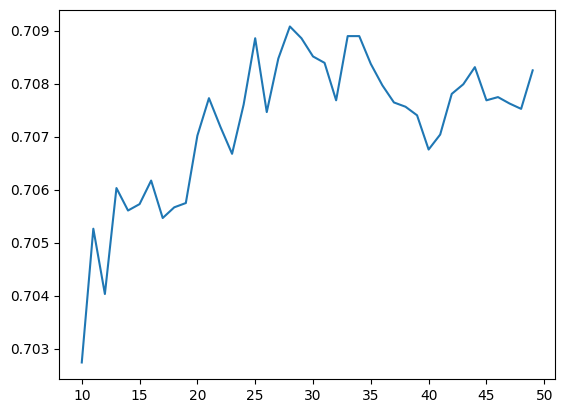

In [137]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(range(10, 35), knn_cv.cv_results_['mean_test_score'])

Randomized Search (случайный поиск)

In [ ]:
%%time
clf_rs = RandomizedSearchCV(KNeighborsClassifier(), params, cv=5, scoring='accuracy')
clf_rs.fit(X_train, y_train)

CPU times: user 11.5 s, sys: 124 ms, total: 11.6 s
Wall time: 8.13 s


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': range(1, 30)},
                   scoring='accuracy')

In [ ]:
# В данном случае оба способа нашли одинаковое решение
clf_rs.best_score_, clf_rs.best_params_

(0.7023492063492063, {'n_neighbors': 12})

In [ ]:
knn_cv.best_score_, knn_cv.best_params_

(0.7023492063492063, {'n_neighbors': 12})

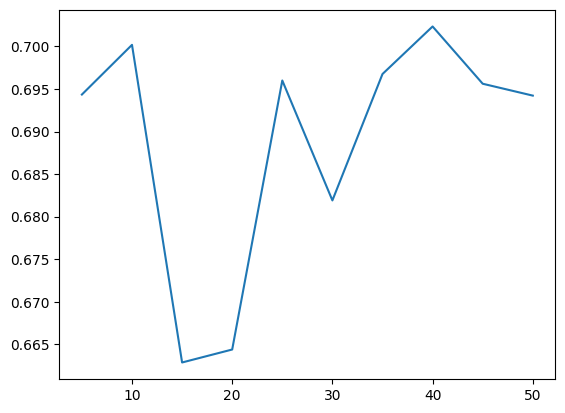

In [ ]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
n_range = np.array(range(5,55,5))
plt.plot(n_range, clf_rs.cv_results_['mean_test_score'])